In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
boston_dataset = load_boston()

In [3]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

In [4]:
data['PRICE'] = boston_dataset.target

# DOLLAR PRICE REGRESSION

In [5]:
prices = data['PRICE'] 
features = data.drop('PRICE', axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

In [6]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [7]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.128181
ZN,0.063198
INDUS,-0.007576
CHAS,1.974515
NOX,-16.271989
RM,3.108456
AGE,0.016292
DIS,-1.483014
RAD,0.303988
TAX,-0.012082


In [8]:
print(f'Intercept>{regr.intercept_}')

Intercept>36.53305138282439


In [9]:
print(f'Training data r-squared: {regr.score(X_train, y_train)}')
print(f'Test data r-squared: {regr.score(X_test, y_test)}')

Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115628


# LOG PRICE REGRESSION

In [10]:
prices = np.log(data['PRICE']) 
features = data.drop('PRICE', axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

In [11]:
regr = LinearRegression()
regr.fit(X_train, y_train)

LinearRegression()

In [12]:
print('Training data r-squared:', regr.score(X_train, y_train))
print('Test data r-squared:', regr.score(X_test, y_test))

Training data r-squared: 0.7930234826697583
Test data r-squared: 0.7446922306260724


In [13]:
pd.DataFrame(data=regr.coef_, index=X_train.columns, columns=['coef'])

,coef
CRIM,-0.010672
ZN,0.001579
INDUS,0.002030
CHAS,0.080331
NOX,-0.704068
RM,0.073404
AGE,0.000763
DIS,-0.047633
RAD,0.014565
TAX,-0.000645


In [14]:
print('Intercept', regr.intercept_)

Intercept 4.05994387177519


# P-VALUES USING THE STATS MODEL

In [15]:
results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

In [16]:
print(results.params, '\n')

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64 



In [17]:
print(results.pvalues,'\n')

const      1.188124e-52
CRIM       1.753774e-14
ZN         8.607727e-03
INDUS      4.445368e-01
CHAS       3.824015e-02
NOX        2.729624e-05
RM         1.089112e-04
AGE        2.091731e-01
DIS        1.812912e-07
RAD        3.746363e-07
TAX        5.145680e-05
PTRATIO    7.549821e-09
B          6.326839e-06
LSTAT      3.105305e-37
dtype: float64 



In [18]:
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


### VIF TEST FOR MULTICOLLINEARITY

In [19]:
#VIF test on TAX
variance_inflation_factor(exog =sm.add_constant(X_train).values, exog_idx=10)

8.508856493040817

In [20]:
#Preparing for a loop to test the VIF of all the features
# adding a constant col to the X_train
X_incl_const = sm.add_constant(X_train)

In [21]:
X_incl_const

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
50,1.0,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45
367,1.0,13.52220,0.0,18.10,0.0,0.631,3.863,100.0,1.5106,24.0,666.0,20.2,131.42,13.33
34,1.0,1.61282,0.0,8.14,0.0,0.538,6.096,96.9,3.7598,4.0,307.0,21.0,248.31,20.34
78,1.0,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
172,1.0,0.13914,0.0,4.05,0.0,0.510,5.572,88.5,2.5961,5.0,296.0,16.6,396.90,14.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,1.0,0.16760,0.0,7.38,0.0,0.493,6.426,52.3,4.5404,5.0,287.0,19.6,396.90,7.20
15,1.0,0.62739,0.0,8.14,0.0,0.538,5.834,56.5,4.4986,4.0,307.0,21.0,395.62,8.47
484,1.0,2.37857,0.0,18.10,0.0,0.583,5.871,41.9,3.7240,24.0,666.0,20.2,370.73,13.34
125,1.0,0.16902,0.0,25.65,0.0,0.581,5.986,88.4,1.9929,2.0,188.0,19.1,385.02,14.81


In [22]:
# looping to get the VIF of all features
for i in range(len(X_incl_const.columns)):
    print(variance_inflation_factor(exog =sm.add_constant(X_train).values, exog_idx=i), '\n')

597.5487126763895 

1.7145250443932485 

2.3328224265597584 

3.943448822674636 

1.0788133385000578 

4.410320817897635 

1.8404053075678568 

3.3267660823099408 

4.222923410477865 

7.314299817005058 

8.508856493040817 

1.839911632651406 

1.3386713255364715 

2.812544292793034 



In [23]:
# modifying the loop for VIF to make a Dataframe

vif = []

for i in range(X_incl_const.shape[1]):
    
    
    vif.append(variance_inflation_factor(exog=X_incl_const.values, exog_idx=i))
    
pd.DataFrame({'coef_name': X_incl_const.columns, 'vif': np.around(vif, 2)})

,coef_name,vif
0,const,597.55
1,CRIM,1.71
2,ZN,2.33
3,INDUS,3.94
4,CHAS,1.08
5,NOX,4.41
6,RM,1.84
7,AGE,3.33
8,DIS,4.22
9,RAD,7.31


## BIC or Bayesian Information Criterion¶
#### CALCULATING THE BIC WITH LOG PRICES AND ALL THE FEATURES

In [24]:
X_incl_const = sm.add_constant(X_train)
model = sm.OLS(y_train, X_incl_const)
results_1 = model.fit()

In [25]:
results_1.bic

-139.74997769478875

In [26]:
results_1.rsquared

0.7930234826697582

In [27]:
results_1.params

const      4.059944
CRIM      -0.010672
ZN         0.001579
INDUS      0.002030
CHAS       0.080331
NOX       -0.704068
RM         0.073404
AGE        0.000763
DIS       -0.047633
RAD        0.014565
TAX       -0.000645
PTRATIO   -0.034795
B          0.000516
LSTAT     -0.031390
dtype: float64

In [28]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_2 = model.fit()

In [29]:
results_2.bic

-145.14508855591163

In [30]:
results_2.rsquared

0.7927126289415163

In [31]:
results_2.params

const      4.056231
CRIM      -0.010721
ZN         0.001551
CHAS       0.082795
NOX       -0.673365
RM         0.071739
AGE        0.000766
DIS       -0.049394
RAD        0.014014
TAX       -0.000596
PTRATIO   -0.034126
B          0.000511
LSTAT     -0.031262
dtype: float64

##### CALCULATING THE BIC WITH LOG PRICES AFTER DROPPING THE INDUS and AGE FEATURE

In [32]:
X_incl_const = sm.add_constant(X_train)
X_incl_const = X_incl_const.drop(['INDUS','AGE'], axis =1)
model = sm.OLS(y_train, X_incl_const)
results_3 = model.fit()

In [33]:
results_3.bic

-149.49934294224656

In [34]:
results_3.rsquared

0.7918657661852815

In [35]:
results_3.params

const      4.035922
CRIM      -0.010702
ZN         0.001461
CHAS       0.086449
NOX       -0.616448
RM         0.076133
DIS       -0.052692
RAD        0.013743
TAX       -0.000590
PTRATIO   -0.033481
B          0.000518
LSTAT     -0.030271
dtype: float64

In [36]:
org_coef = pd.DataFrame({'coef': results_1.params, 'p-value': round(results_1.pvalues, 3)})
org_coef

,coef,p-value
const,4.059944,0.000
CRIM,-0.010672,0.000
ZN,0.001579,0.009
INDUS,0.002030,0.445
CHAS,0.080331,0.038
NOX,-0.704068,0.000
RM,0.073404,0.000
AGE,0.000763,0.209
DIS,-0.047633,0.000
RAD,0.014565,0.000


In [37]:
coef_minus_indus = pd.DataFrame({'coef': results_2.params, 'p-value': round(results_2.pvalues, 3)})
coef_minus_indus

,coef,p-value
const,4.056231,0.000
CRIM,-0.010721,0.000
ZN,0.001551,0.010
CHAS,0.082795,0.032
NOX,-0.673365,0.000
RM,0.071739,0.000
AGE,0.000766,0.207
DIS,-0.049394,0.000
RAD,0.014014,0.000
TAX,-0.000596,0.000


In [38]:
coef_minus_indus_age = pd.DataFrame({'coef': results_3.params, 'p-value': round(results_3.pvalues, 3)})
coef_minus_indus_age

,coef,p-value
const,4.035922,0.000
CRIM,-0.010702,0.000
ZN,0.001461,0.014
CHAS,0.086449,0.025
NOX,-0.616448,0.000
RM,0.076133,0.000
DIS,-0.052692,0.000
RAD,0.013743,0.000
TAX,-0.000590,0.000
PTRATIO,-0.033481,0.000


In [39]:
frames = [org_coef, coef_minus_indus, coef_minus_indus_age]
pd.concat(frames, axis=1, sort = False)

,coef,p-value,coef,p-value,coef,p-value
const,4.059944,0.000,4.056231,0.000,4.035922,0.000
CRIM,-0.010672,0.000,-0.010721,0.000,-0.010702,0.000
ZN,0.001579,0.009,0.001551,0.010,0.001461,0.014
INDUS,0.002030,0.445,NaN,NaN,NaN,NaN
CHAS,0.080331,0.038,0.082795,0.032,0.086449,0.025
NOX,-0.704068,0.000,-0.673365,0.000,-0.616448,0.000
RM,0.073404,0.000,0.071739,0.000,0.076133,0.000
AGE,0.000763,0.209,0.000766,0.207,NaN,NaN
DIS,-0.047633,0.000,-0.049394,0.000,-0.052692,0.000
RAD,0.014565,0.000,0.014014,0.000,0.013743,0.000


## Residual Plots

In [40]:
## Model w/o indus and age
prices = np.log(data['PRICE'])

features = data.drop(['PRICE', 'INDUS', 'AGE'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, prices, 
                                                    test_size=0.2, random_state=10)

results = sm.OLS(y_train, sm.add_constant(X_train)).fit()

corr = round(y_train.corr(results.fittedvalues), 2)

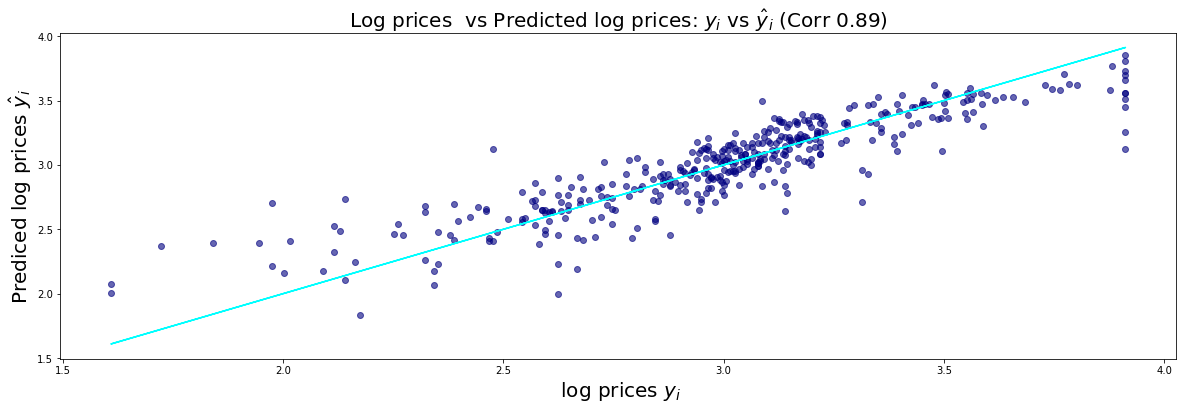

In [41]:
# plot of 'log prices' vs 'Predicted log prices'

plt.figure(figsize=(20,6))

plt.scatter(x=y_train, y=results.fittedvalues, c='navy', alpha=0.6)

plt.plot(y_train, y_train, color='cyan')

plt.xlabel(' log prices $y _i$', fontsize=20)

plt.ylabel('Prediced log prices $\hat y _i$', fontsize=20)

plt.title(f'Log prices  vs Predicted log prices: $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)


plt.show()

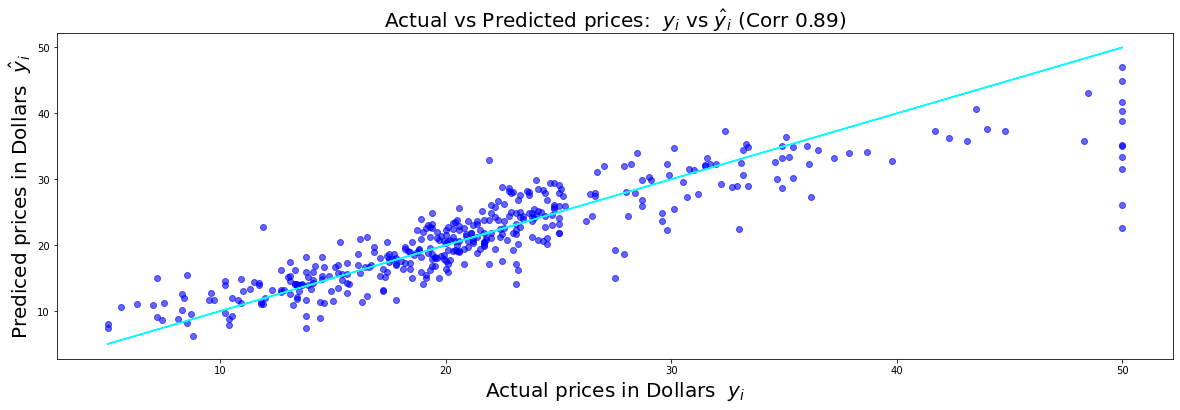

In [42]:
# Actual Prices vs Predicted Prices in 1000's of Dollars
plt.figure(figsize=(20,6))

plt.scatter(x=np.e**y_train, y=np.e**results.fittedvalues, c='blue', alpha=0.6)

plt.plot(np.e**y_train, np.e**y_train, color='cyan')

plt.xlabel('Actual prices in Dollars  $y _i$', fontsize=20)

plt.ylabel('Prediced prices in Dollars  $\hat y _i$', fontsize=20)

plt.title(f'Actual vs Predicted prices:  $y _i$ vs $\hat y_i$ (Corr {corr})', fontsize=20)

plt.show()

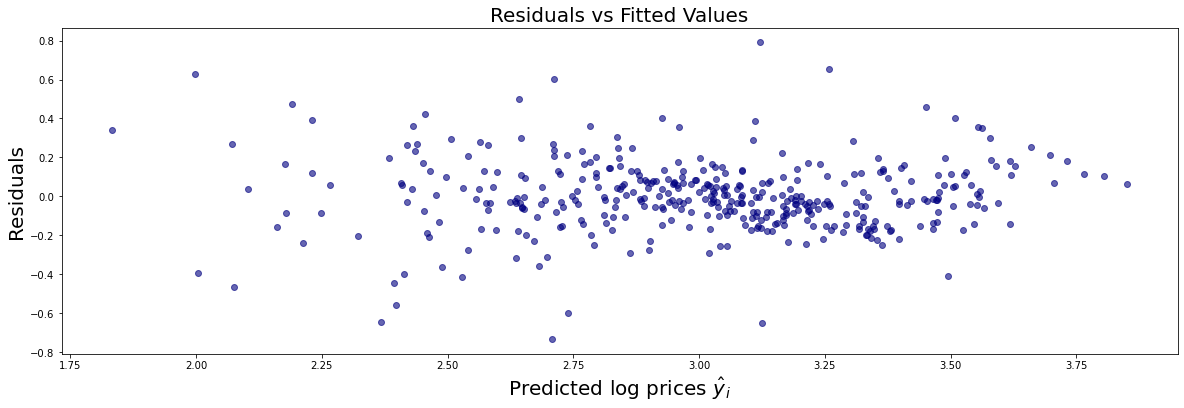

In [43]:
# Residual plot
plt.figure(figsize=(20,6))
plt.scatter(x=results.fittedvalues, y=results.resid, c='navy', alpha=0.6)
plt.xlabel('Predicted log prices $\hat y _i$', fontsize=20)
plt.ylabel('Residuals', fontsize=20)
plt.title('Residuals vs Fitted Values', fontsize=20)
plt.show()

In [44]:
reduced_log_mse = round(results.mse_resid, 3)
reduced_log_rsquared = round(results.rsquared, 3)

In [45]:
resid_mean = round(results.resid.mean(), 3)
resid_skew = round(results.resid.skew(), 3)

In [46]:
resid_mean 

-0.0

In [47]:
resid_skew 

0.118

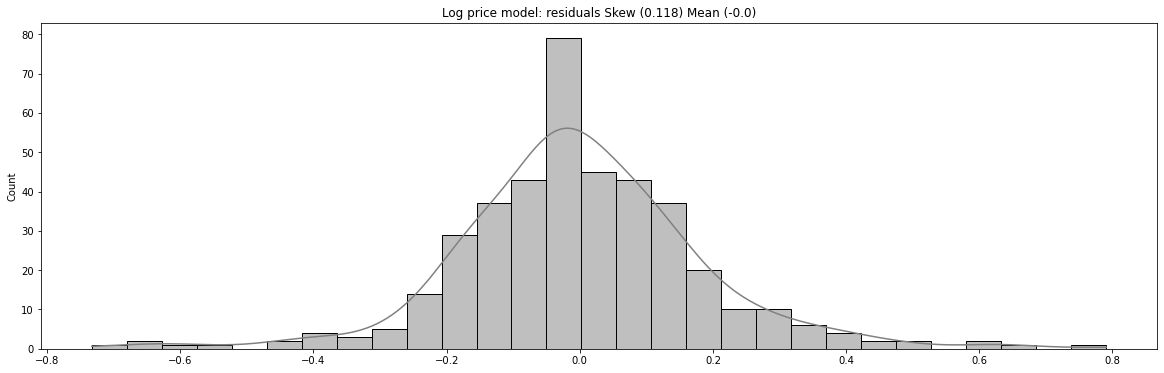

In [48]:
plt.figure(figsize= (20,6))
sns.histplot(results.resid,kde=True,color='grey')# using the distplot of seaborn
plt.title(f'Log price model: residuals Skew ({resid_skew}) Mean ({resid_mean})')
plt.show()